In [3]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

In [4]:
# Importing dataset
df = pd.read_csv('HistoricalQuotes.csv',index_col='Date', parse_dates=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2020-02-28 to 2010-03-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Close/Last  2518 non-null   object
 1    Volume      2518 non-null   int64 
 2    Open        2518 non-null   object
 3    High        2518 non-null   object
 4    Low         2518 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [6]:
df.describe()


,Volume
count,2.518000e+03
mean,7.258009e+07
std,5.663113e+07
min,1.136205e+07
25%,3.053026e+07
50%,5.295469e+07
75%,9.861006e+07
max,4.624423e+08


In [7]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [8]:
df.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-05,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2010-03-04,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2010-03-03,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2010-03-02,$29.8357,141486282,$29.99,$30.1186,$29.6771
2010-03-01,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [9]:
df.shape

(2518, 5)

In [10]:
df.isna().any()

 Close/Last    False
 Volume        False
 Open          False
 High          False
 Low           False
dtype: bool

In [11]:
df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')
df.head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd fr

,Close,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37
2020-02-27,273.52,80151380,281.10,286.00,272.96
2020-02-26,292.65,49678430,286.53,297.88,286.50
2020-02-25,288.08,57668360,300.95,302.53,286.13
2020-02-24,298.18,55548830,297.26,304.18,289.23


In [12]:
df.dtypes

Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [13]:
df.corr()

,Close,Volume,Open,High,Low
Close,1.000000,-0.608502,0.999653,0.999828,0.999842
Volume,-0.608502,1.000000,-0.607704,-0.605073,-0.611775
Open,0.999653,-0.607704,1.000000,0.999842,0.999810
High,0.999828,-0.605073,0.999842,1.000000,0.999756
Low,0.999842,-0.611775,0.999810,0.999756,1.000000


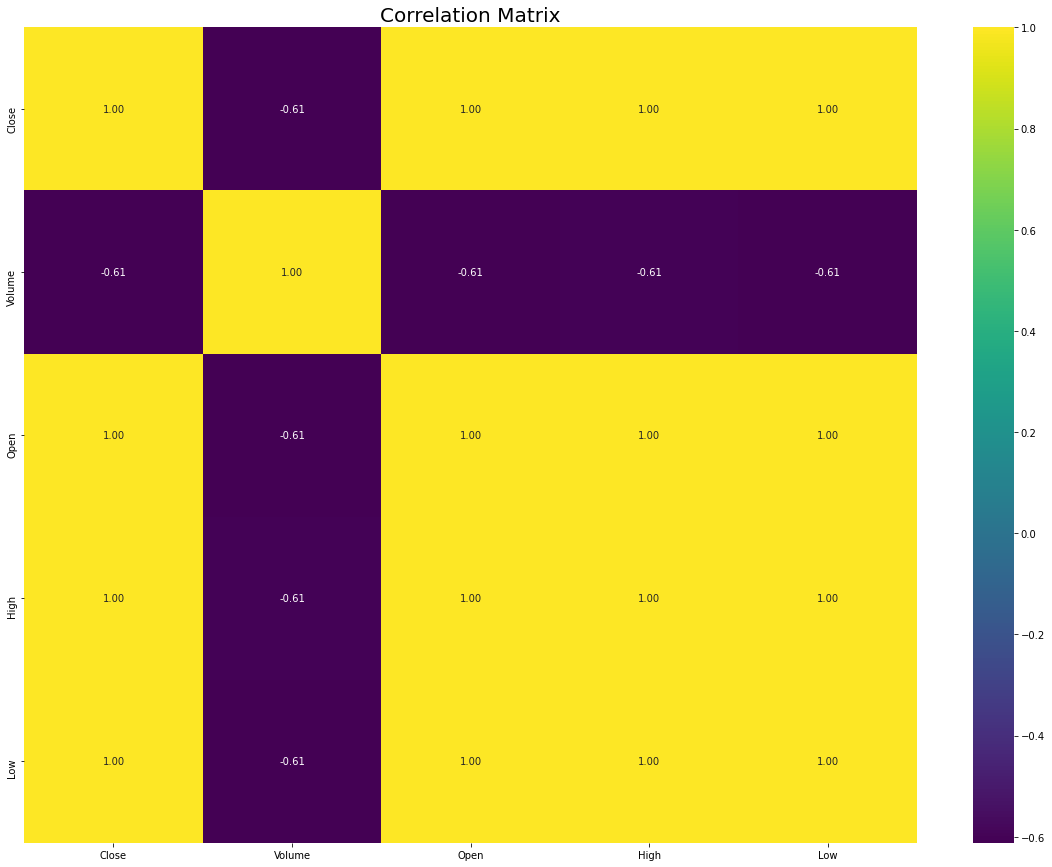

In [14]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "viridis" )
ax.set_title("Correlation Matrix", fontsize=20) 
plt.show()

In [15]:
df_test = df.head(40)
df = df[40:]

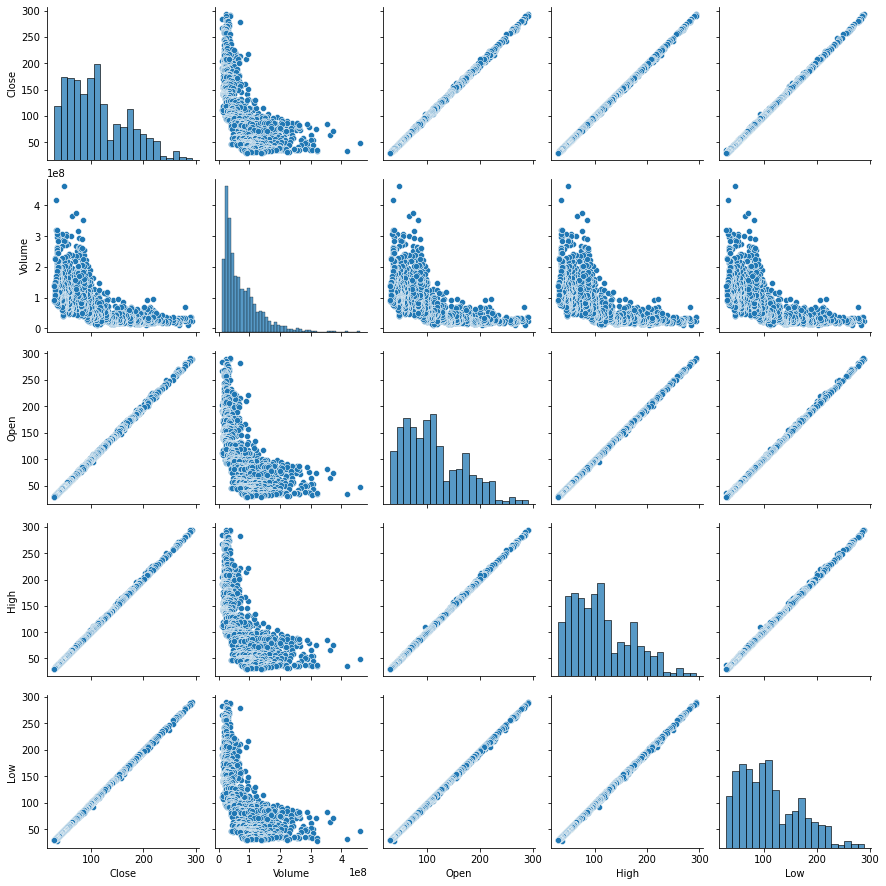

In [16]:
sns.pairplot(df)

<AxesSubplot:xlabel='Date'>

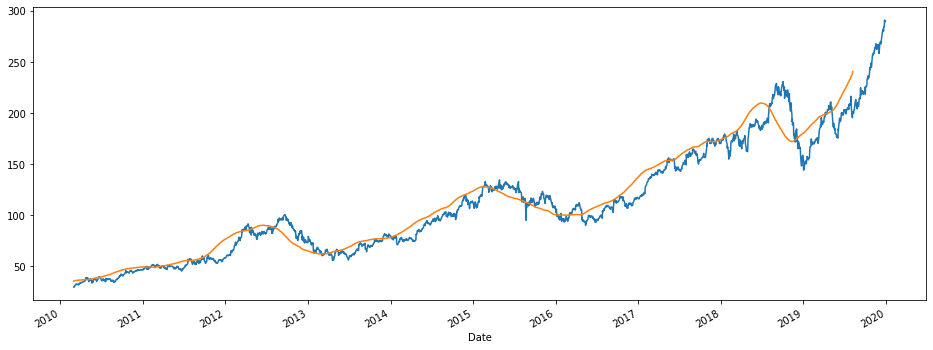

In [17]:
df['Open'].plot(figsize=(16, 6))
df.rolling(100).mean()['Open'].plot()

In [18]:
training_df = df['Open']
training_df = pd.DataFrame(training_df)

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_df_scaled = sc.fit_transform(training_df)

In [20]:
# Create structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 2477):
    X_train.append(training_df_scaled[i-60:i, 0])
    y_train.append(training_df_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.99545328],
        [0.99365752],
        [1.        ],
        ...,
        [0.75512671],
        [0.75050358],
        [0.75222293]],

       [[0.99365752],
        [1.        ],
        [0.97592914],
        ...,
        [0.75050358],
        [0.75222293],
        [0.74981584]],

       [[1.        ],
        [0.97592914],
        [0.97543243],
        ...,
        [0.75222293],
        [0.74981584],
        [0.72226807]],

       ...,

       [[0.02927705],
        [0.02448045],
        [0.02419657],
        ...,
        [0.00685561],
        [0.00778368],
        [0.00501629]],

       [[0.02448045],
        [0.02419657],
        [0.01833971],
        ...,
        [0.00778368],
        [0.00501629],
        [0.00192682]],

       [[0.02419657],
        [0.01833971],
        [0.02266826],
        ...,
        [0.00501629],
        [0.00192682],
        [0.00174151]]])

In [21]:
!pip install keras 
!pip install tensorflow

You are using pip version 19.0.3, however version 21.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
# Import Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
# Initialize RNN

regressor = Sequential()

In [24]:
# First LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


# Second LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Thirs LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Fourth LSTM layer

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Output layer

regressor.add(Dense(units = 1))

In [ ]:
# Compile RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fit RNN

regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

In [ ]:
# getting the real stock of 2017 i.e., importing the test dataset

test_data = pd.read_csv('HistoricalQuotes.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()

In [ ]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

In [ ]:
real_stock_price = df_test['Open'].values
real_stock_price

In [ ]:
df_test.info()

In [ ]:
test_set = df_test['Open']
test_set = pd.DataFrame(test_set)
test_set.info()

In [ ]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price = predicted_stock_price.values
predicted_stock_price

In [ ]:
real_stock_price

In [ ]:
# Plot the results

plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
len(df)

In [ ]:
len(test)